# Image Classification using HoG (10 points)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = "./"
q1_path = path + "Assignment2 Data/Q1/"


In [4]:
# Train and test set
train = []
test = []

N_train = 5
N_test = 5

dim = (128, 128)

train_path = os.path.join(q1_path, "training")
test_path = os.path.join(q1_path, "test")

def read_images(path):
    imgs = []
    y = []
    for img in os.listdir(path):
        try:
            img_path = os.path.join(path, img)

            # Read the image logo of kraft and mc
            img1 = cv2.imread(img_path)
            img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

            # Resize the image
            img1 = cv2.resize(img1, dim)
            # Add the images to the training set
            imgs.append(img1)
            if "mc" in img:
                y.append("Mc")
            else:
                y.append("Krafts")
        except:
            pass


    return imgs, y


In [5]:
# Load train and test
train, y_train = read_images(train_path)
test, y_test = read_images(test_path)


In [6]:
def visualize_HoG(img, hog_descriptor, nbins, cell_size):

        # Reshape the feature vector to [number of blocks in x and y direction, number of cells per block in x and y direction, number of bins]
        # This will be useful later when we plot the feature vector, so that the feature vector indexing matches the image indexing
    hog_descriptor_reshaped = hog_descriptor.reshape(16,
                                                    16,
                                                    2,
                                                    2,
                                                     nbins).transpose((1, 0, 2, 3, 4))

    # Create an array that will hold the average gradients for each cell
    ave_grad = np.zeros((32, 32, nbins))

    # Create an array that will count the number of histograms per cell
    hist_counter = np.zeros((32, 32, 1))

    # Add up all the histograms for each cell and count the number of histograms per cell
    for i in range(2):
        for j in range(2):
            ave_grad[i:16 + i,
                    j:16 + j] += hog_descriptor_reshaped[:, :, i, j, :]

            hist_counter[i:16 + i,
                        j:16 + j] += 1

    # Calculate the average gradient for each cell
    ave_grad /= hist_counter

    # Calculate the total number of vectors we have in all the cells.
    len_vecs = ave_grad.shape[0] * ave_grad.shape[1] * ave_grad.shape[2]

    # Create an array that has num_bins equally spaced between 0 and 180 degress in radians.
    deg = np.linspace(0, np.pi, nbins, endpoint=False)

    # Each cell will have a histogram with num_bins. For each cell, plot each bin as a vector (with its magnitude
    # equal to the height of the bin in the histogram, and its angle corresponding to the bin in the histogram).
    # To do this, create rank 1 arrays that will hold the (x,y)-coordinate of all the vectors in all the cells in the
    # image. Also, create the rank 1 arrays that will hold all the (U,V)-components of all the vectors in all the
    # cells in the image. Create the arrays that will hold all the vector positons and components.
    U = np.zeros((len_vecs))
    V = np.zeros((len_vecs))
    X = np.zeros((len_vecs))
    Y = np.zeros((len_vecs))

    # Set the counter to zero
    counter = 0

    # Use the cosine and sine functions to calculate the vector components (U,V) from their maginitudes. Remember the
    # cosine and sine functions take angles in radians. Calculate the vector positions and magnitudes from the
    # average gradient array
    for i in range(ave_grad.shape[0]):
        for j in range(ave_grad.shape[1]):
            for k in range(ave_grad.shape[2]):
                U[counter] = ave_grad[i, j, k] * np.cos(deg[k])
                V[counter] = ave_grad[i, j, k] * np.sin(deg[k])

                X[counter] = (cell_size[0] / 2) + (cell_size[0] * i)
                Y[counter] = (cell_size[1] / 2) + (cell_size[1] * j)

                counter = counter + 1

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Display the image
    ax1.set(title='Grayscale Image')
    ax1.imshow(img, cmap='gray')

    # Plot the feature vector (HOG Descriptor)
    ax2.set(title='HOG Descriptor')
    ax2.quiver(Y, X, U, V, color='white', headwidth=0,
            headlength=0, scale_units='inches', scale=3)
    ax2.invert_yaxis()
    ax2.set_aspect(aspect=1)
    ax2.set_facecolor('black')


In [7]:
def compute_HoG(imgs):

    img_size = (128, 128)  # h x w in pixels
    cell_size = (4, 4)  # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 8  # number of orientation bins

    # create HoG Object
    # winSize is the size of the image cropped to multiple of the cell size
    # all arguments should be given in terms of number of pixels
    hog = cv2.HOGDescriptor(_winSize=(img_size[1] // cell_size[1] * cell_size[1],
                                      img_size[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(
                                cell_size[1] * block_size[1], cell_size[0] * block_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins,
                            )

    features = []

    for i in range(len(imgs)):
        feature = hog.compute(imgs[i]).reshape(1, -1)
        features.append(feature)
        visualize_HoG(imgs[i], feature, nbins, cell_size)
    features = np.vstack(features)
    return features


/tmp/ipykernel_9464/3326107344.py:27: RuntimeWarning: invalid value encountered in divide
  ave_grad /= hist_counter


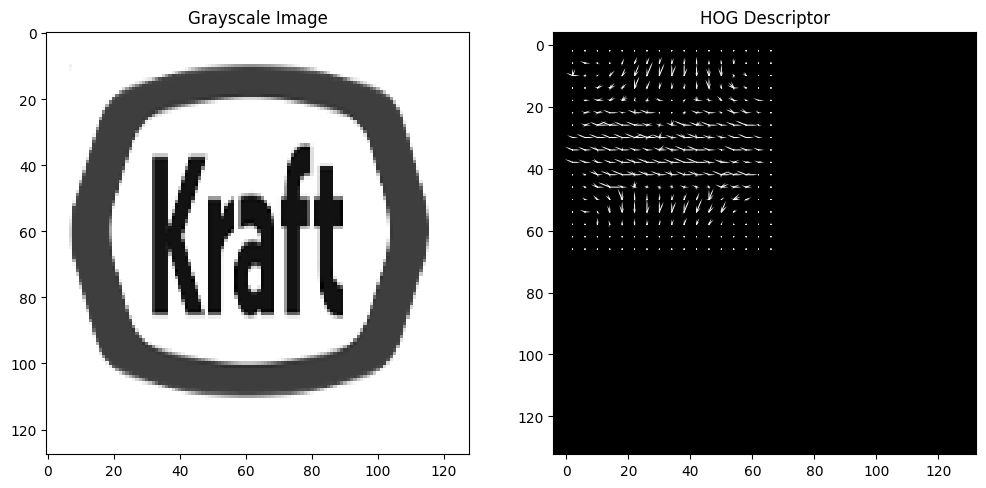

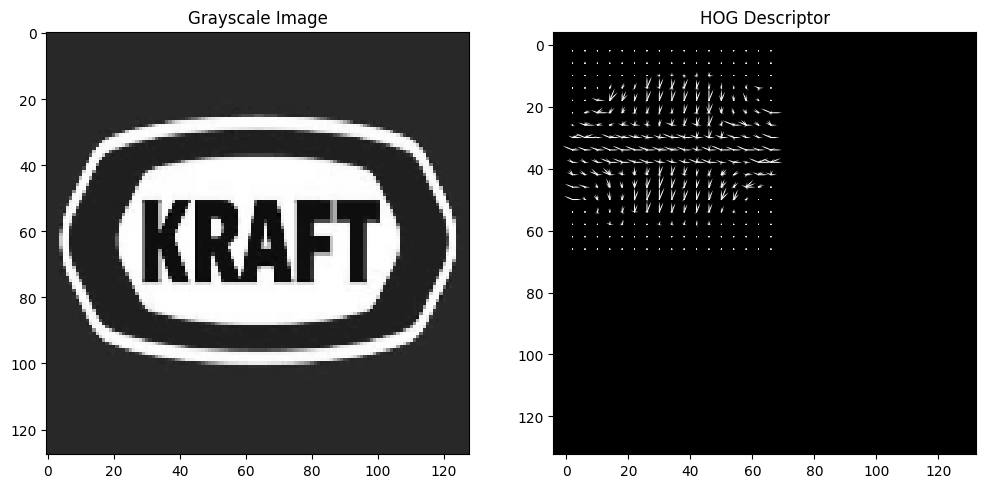

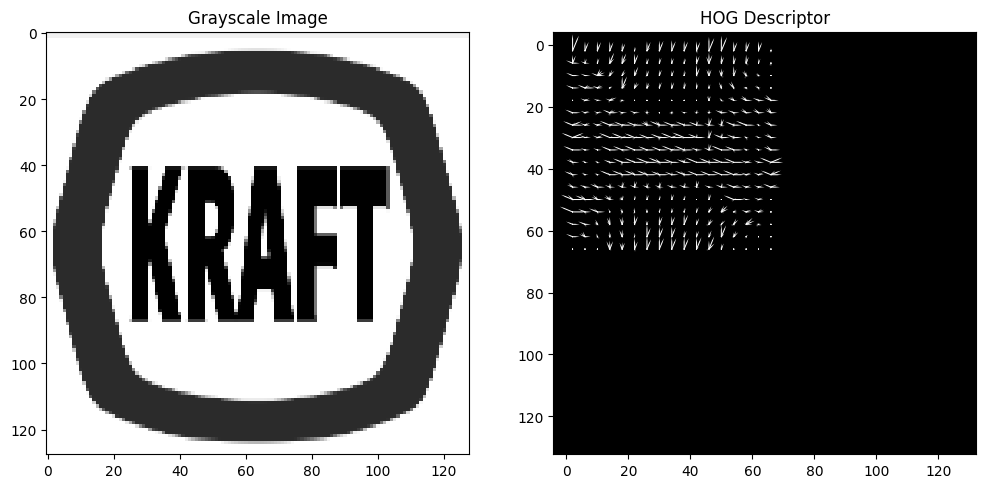

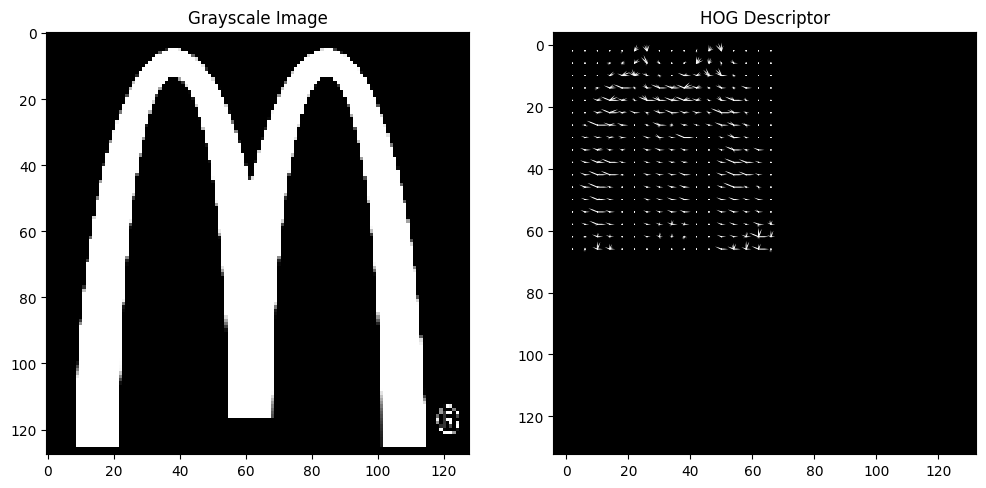

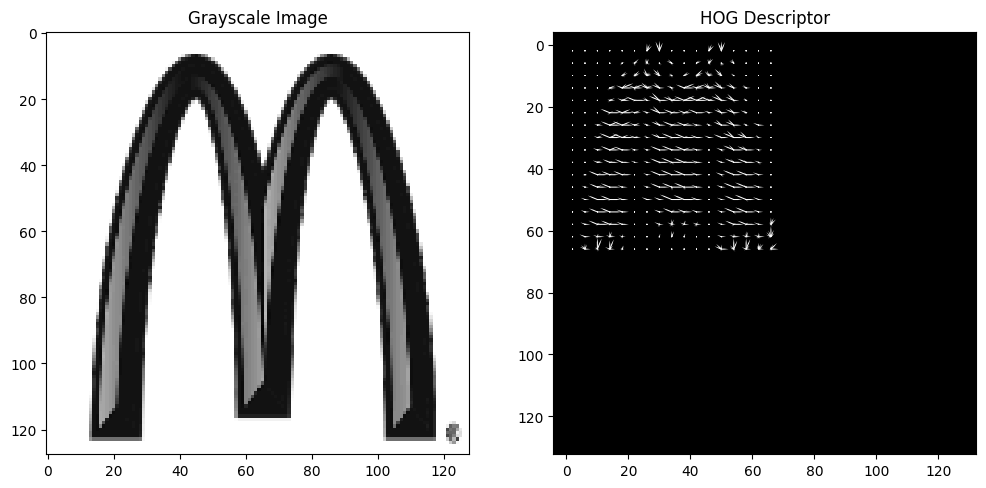

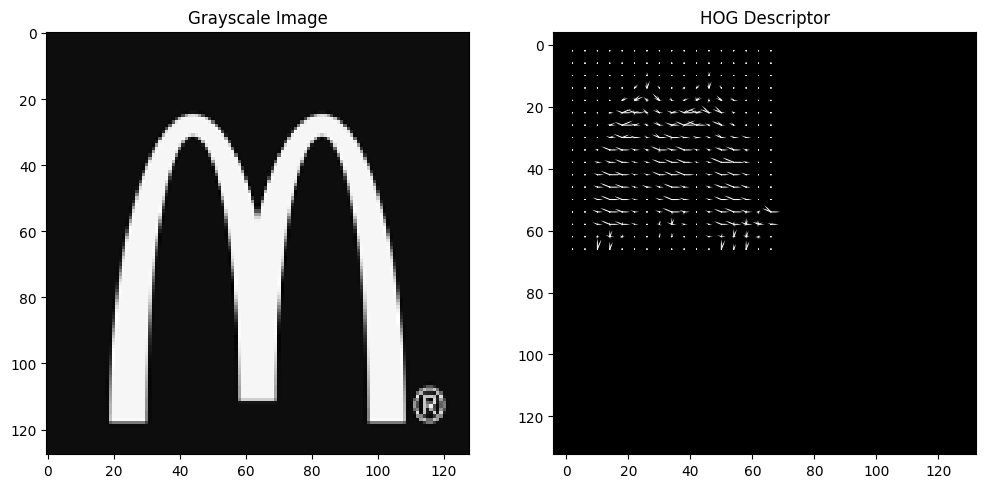

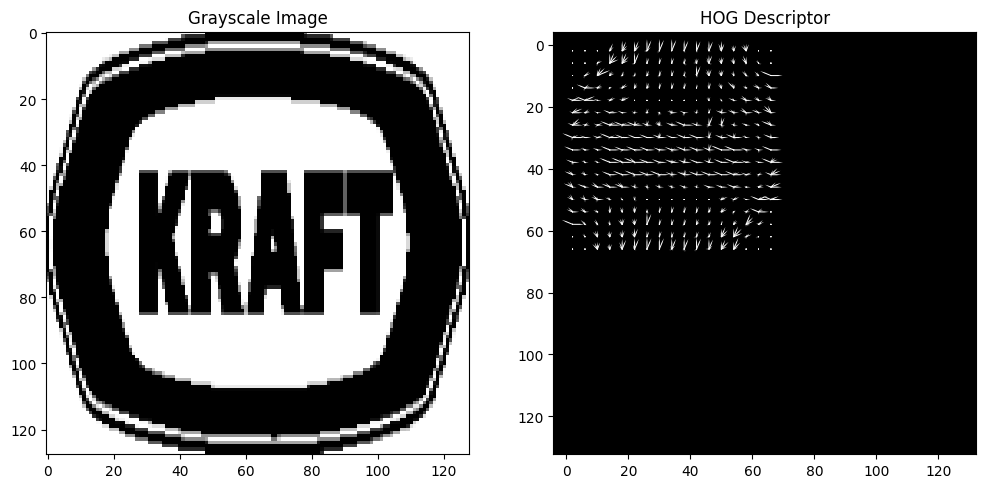

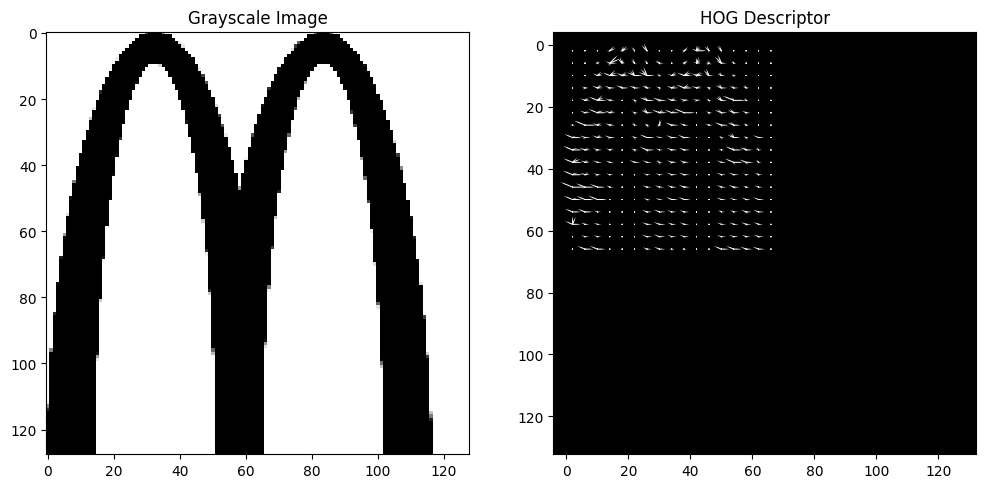

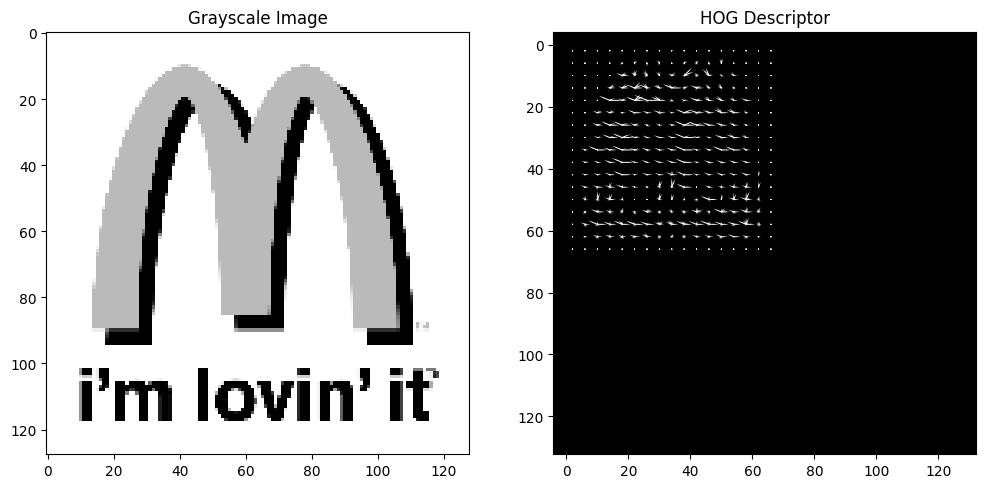

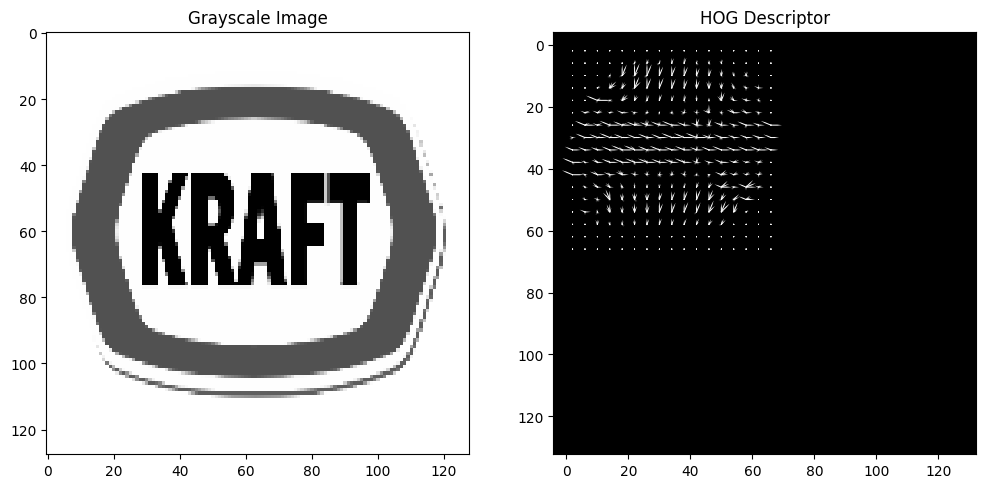

In [8]:
train_features = compute_HoG(train)


In [9]:
test_features = compute_HoG(test)


/tmp/ipykernel_9464/3326107344.py:27: RuntimeWarning: invalid value encountered in divide
  ave_grad /= hist_counter


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_features, y_train)
y_pred = knn.predict(test_features)


In [ ]:
accuracy_score(y_test, y_pred)

1.0

The classifier works well on all the test images. Hog features are widely used in image classification for the following properties:,
- Robustness to different illuminations and contrasts: HoG features are computed based on the gradient of the image, which makes them robust to changes in illumination and contrast.,
- Invariance to affine transformation like translations and rotations. HoG is also invariant to small changes in scale.,
- Localized feature: the features are computed in a localized manner, they described local properties instead of globals ones.,
For classifying logos under rotations SIFT and HoG are both good methods to retrieve some good, rotation invariant,features from the images. After, we can train a classifier (KNN, regressor, ...) using this features. We can also perform data augmentation adding some rotated logos to our training set.

# Part 2

In [ ]:
import cv2


In [ ]:
path = "./"
q2_path = path + "Assignment2 Data/Q2/"


In [ ]:
img1 = cv2.imread(q2_path + "image1.jpeg")
img2 = cv2.imread(q2_path + "image2.jpeg")
img3 = cv2.imread(q2_path + "image3.jpeg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)


In [ ]:
""" 
Compute and returns:
- Keypoints
- Keypoints' descriptors
- Image with the corresponding keypoints 
"""


def sift(img):
    sift = cv2.SIFT_create()
    img1 = img.copy()
    # Compute keypoints and descriptors
    kp, ds = sift.detectAndCompute(img, None)
    # Draw the keypoints on the image
    img1 = cv2.drawKeypoints(
        img1, kp, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return kp, ds, img1


In [ ]:
# Compute and returns all the keypoints and the descriptors for the images
# given in input
def compute_kp(imgs):
    # List containing the keypoints for each image
    kps = []    # i.e. kps[1] contains the keypoints of the image imgs[1]
    # List containing the descriptots for each image
    dss = []    # i.e. dss[1] contains the descriptors of the image imgs[1]
    total = len(imgs)

    # Compute the number of rows
    columns = 2
    plt.figure(figsize=(10, 10))
    rows = int(np.ceil(total / columns))

    # Iterate over all images
    for i, img in enumerate(imgs):
        # Compute kp and ds and the resulting image
        kp, ds, img = sift(img)

        # Plot the image with the keypoints
        plt.subplot(rows, columns, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        kps.append(kp)
        dss.append(ds)
    plt.show()
    return kps, dss


In [ ]:
# Compute and plot the matches for the input images given the respective keypoints and descriptors
def match_plot(img1, img2, ds1, ds2, kp1, kp2, title=""):

    img1_cp = img1.copy()
    img2_cp = img2.copy()

    # Match descriptors.
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.match(ds1, ds2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the matches across the two images
    img3 = cv2.drawMatches(
        img1_cp, kp1, img2_cp, kp2, matches[:20], None, flags=2)

    plt.figure(figsize=(10, 10))
    plt.title("Matches " + title)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img3)
    plt.show()

    return matches


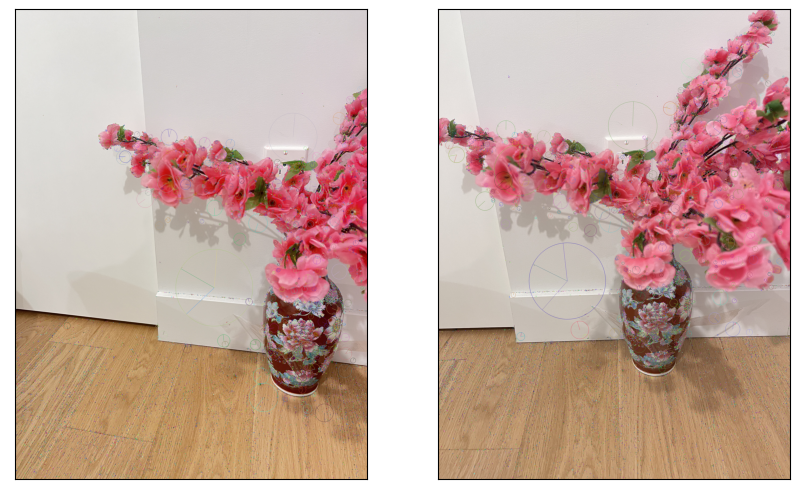

In [ ]:
kps, dss = compute_kp([img1, img2])


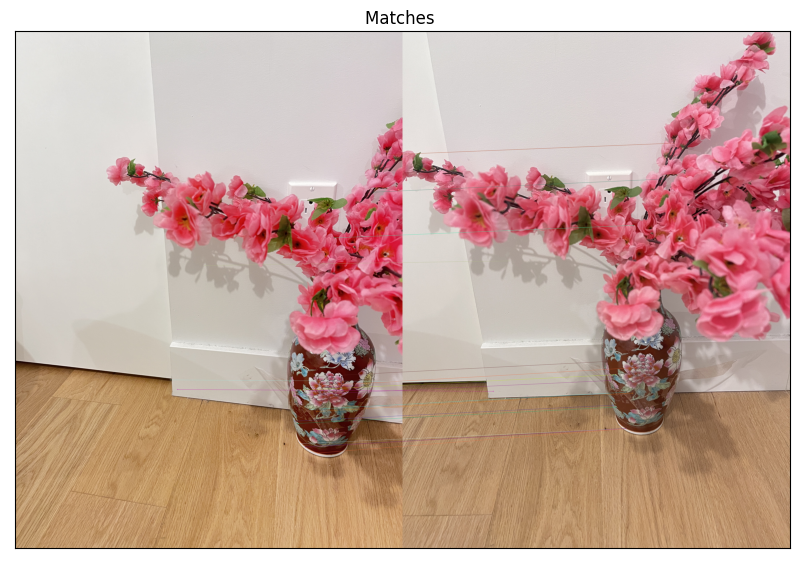

In [ ]:
good = match_plot(
    img1, img2, dss[0], dss[1], kps[0], kps[1], title="")


In [ ]:

def RANSAC(img, kp1, kp2, good):
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good])
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good])
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5)
    # Calculate Homography
    size = (img.shape[1], img.shape[0])
    homo_img = cv2.warpPerspective(img, M, size)
    print(homo_img.shape)
    plt.imshow(homo_img), plt.show()
    return homo_img


In [ ]:
def stiching(img1, img2):
    h, w, _ = img1.shape
    # Create an empty output image with the same height as the input images and the chosen width
    output = np.zeros((h, 2*w, 3), np.uint8)

    # Stich the images
    output[:, :w] = img1[:, :w] 
    output[:, w//2:w] = img2[:, w//2:]
    plt.title("Stiched images")
    plt.imshow(output)
    return output


(4032, 3024, 3)


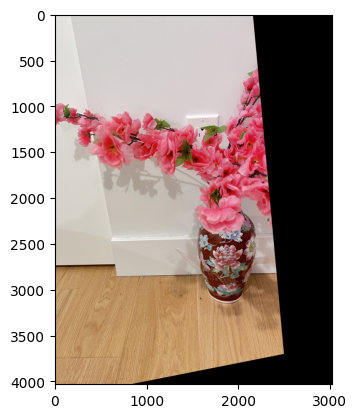

In [ ]:
img12 = RANSAC(img1, kps[0], kps[1], good[:20])


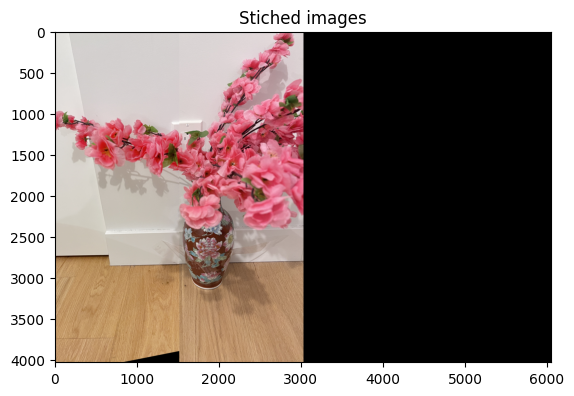

In [ ]:
stiching(img12, img2);


In [ ]:
def boundingRect(img):
    """Compute and return the up-right bounding rectangle of a point set"""
    grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, thresholded = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY)
    return cv2.boundingRect(thresholded)


def computeGaussianPyramid(img, pyr_depth):
    """Compute the gaussian pyramid given an image and pyramid depth. Return list of gaussian pyramid layers."""
    layer = img.copy()
    pyr_gauss = [layer]
    for i in range(pyr_depth):
        layer = cv2.pyrDown(layer)
        pyr_gauss.append(layer)
    return pyr_gauss


def computeLaplacianPyramid(pyr_gauss, pyr_depth):
    """Compute the laplacian pyramid given a gaussian pyramid and pyramid depth. Return list of laplacian pyramid layers."""
    layer = pyr_gauss[pyr_depth-1]
    pyr_lap = [layer]
    for i in range(pyr_depth-1, 0, -1):
        size = (pyr_gauss[i - 1].shape[1], pyr_gauss[i - 1].shape[0])
        gauss_expanded = cv2.pyrUp(pyr_gauss[i], dstsize=size)
        laplacian = cv2.subtract(pyr_gauss[i - 1], gauss_expanded)
        pyr_lap.append(laplacian)
    return pyr_lap


In [ ]:
def blending(A, B):

    # Pyramid depth parameter
    PYR_DEPTH = 3

    # Copy images to avoid overwriting
    img_A = A.copy()
    img_B = B.copy()


    # Left clip
    xLeft = boundingRect(img_A)[0]
    print("xLeft")
    img_A = img_A[:, xLeft:]
    img_B = img_B[:, xLeft:]


    # Determine dimensions
    height, width, depth = img_B.shape
    x, y, width, height = boundingRect(img_B)

    # Create a img_real image before blending
    img_real = img_A.copy()
    img_real[y:y+height, x:x+width] = img_B[y:y+height, x:x+width]

    # Gaussian Pyramid 1 and 2 for img_A and img_B respectively
    pyr_gauss_1 = computeGaussianPyramid(img_A, PYR_DEPTH)
    pyr_gauss_2 = computeGaussianPyramid(img_B, PYR_DEPTH)

    # Compute Laplacian Pyramid 1 and 2 for img_A and img_B respectively
    pyr_lap_1 = computeLaplacianPyramid(pyr_gauss_1, PYR_DEPTH)
    pyr_lap_2 = computeLaplacianPyramid(pyr_gauss_2, PYR_DEPTH)

    # Merge of laplacian pyramids
    pyr_mountain = []
    n = 0
    for img_A_lap, img_B_lap in zip(pyr_lap_1, pyr_lap_2):
        n += 1
        cols, rows, ch = img_A_lap.shape
        laplacian = img_A_lap.copy()
        laplacian = np.hstack(
            (img_A_lap[:, 0:int(rows/2)], img_B_lap[:, int(rows/2):]))
        pyr_mountain.append(laplacian)

    # Reconstruct photo
    img_reconstruct = pyr_mountain[0]
    for i in range(1, PYR_DEPTH):
        size = (pyr_mountain[i].shape[1], pyr_mountain[i].shape[0])
        img_reconstruct = cv2.pyrUp(img_reconstruct, dstsize=size)
        img_reconstruct = cv2.add(pyr_mountain[i], img_reconstruct)

    plt.figure(figsize=(10, 10))
    plt.subplot(211)
    plt.imshow(img_real)
    plt.title("Unblended"), plt.xticks([]), plt.yticks([])
    plt.subplot(212)
    plt.imshow(img_reconstruct)
    plt.title("Pyramid Blending Mask"), plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()


In [ ]:
img12_cp = img12.copy()
#img12_stiched = stiching(img12_cp, img2)


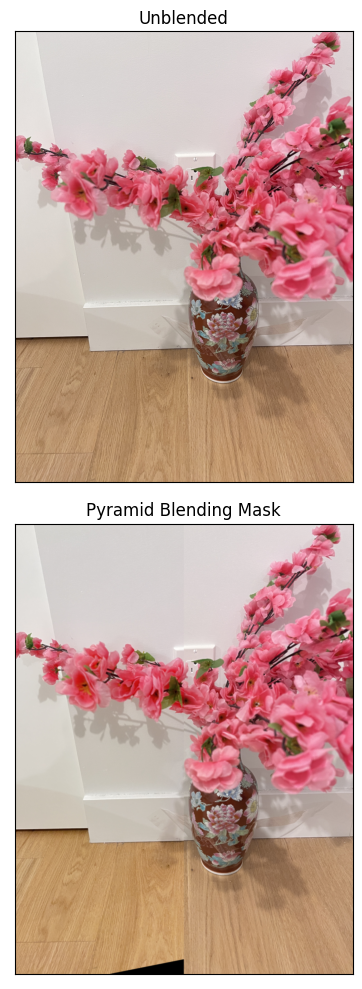

In [ ]:
img12_blended = blending(img12, img2)


In [ ]:
def linear_blending(img1, img2, alpha=0.5, scale=1):

    # [blend_images]

    # Find the height and width of the images
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    if scale != 0:
        blend_area = w1 #// scale
    else:
        blend_area = 0
    # Choose the width of the output image (the width should be greater than or equal to the sum of the widths of the input images)
    width = w1 + blend_area

    # Create an empty output image with the same height as the input images and the chosen width
    output = np.zeros((max(h1, h2), width), np.uint8)

    # Blend the two images using linear blending
    alpha = 0.8  # Set the blending ratio
    output[:, :w1] = img1[:, :] * alpha + output[:, :w1] * (1 - alpha)
    output[:, blend_area:] = img2[:, :] * \
        alpha + output[:, blend_area:] * (1 - alpha)

    # Save the output image
    cv2.imwrite('output.jpg', output)

    plt.title("Linear blending")
    plt.imshow(output, "gray")
    plt.show()
    return output


## Linear Blending

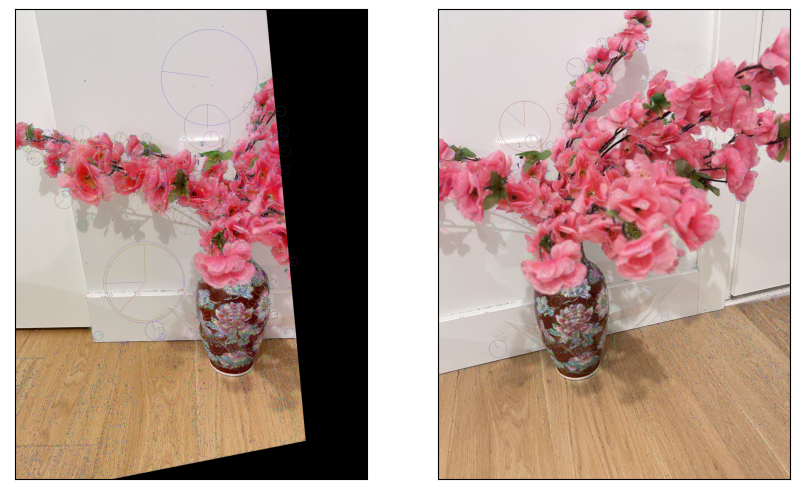

In [ ]:
kps, dss = compute_kp([img12, img3])


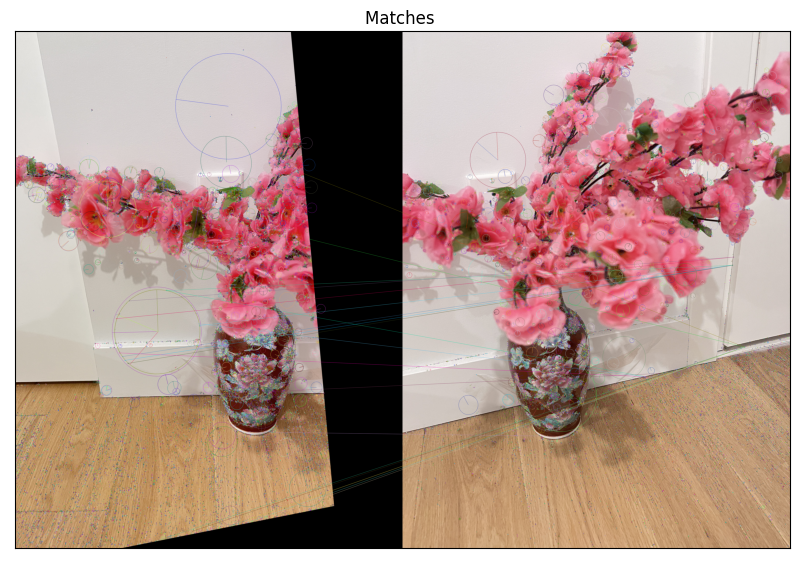

In [ ]:
good = match_plot(
    img12, img3, dss[0], dss[1], kps[0], kps[1], title=""
)


(4032, 3024, 3)


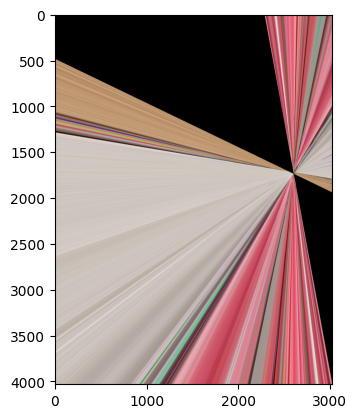

In [ ]:
img13 = RANSAC(img3, kps[0], kps[1], good[:20])


In [ ]:
stiching(img12, img13)
blending(img13, img12)

ValueError: too many values to unpack (expected 2)

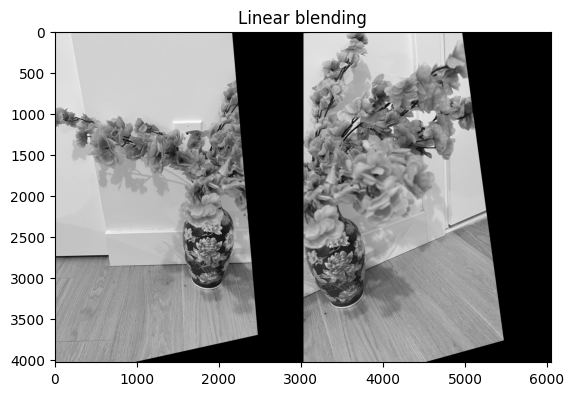

array([[178, 179, 179, ...,   0,   0,   0],
       [177, 178, 179, ...,   0,   0,   0],
       [177, 177, 178, ...,   0,   0,   0],
       ...,
       [124, 121, 121, ...,   0,   0,   0],
       [123, 120, 122, ...,   0,   0,   0],
       [123, 128, 126, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
linear_blending(img12, img13)


# Face detection (10 points)

In [ ]:
import os
import random
import pickle
import scipy as sp


In [ ]:
def load_dataset(path, size):
    # Compute the size of our dataset
    n = len(os.listdir(path))
    size_f = size[0] * size[1]
    imgs = np.zeros((n, *size))
    imgs_f = np.zeros((n, size_f))
    # This will iterate in the Folder
    for i, img in enumerate(os.listdir(path)):
        # Image Path
        new_path = os.path.join(path, img)
        try:
            # Read Image
            img_data = cv2.imread(new_path)
            img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
            img_data_f = img_data.flatten()
            imgs[i] = img_data
            imgs_f[i] = img_data_f
        except:
            pass
    return imgs, imgs_f


In [ ]:
q3_path = path + "/Assignment2 Data/Q3/celeb_faces/drive-download-20230205T204823Z-001/"


In [ ]:
# Load our dataset
size = (218, 178)
train, train_f = load_dataset(q3_path, size)
n = train.shape[0]
print(train.shape)


(400, 218, 178)


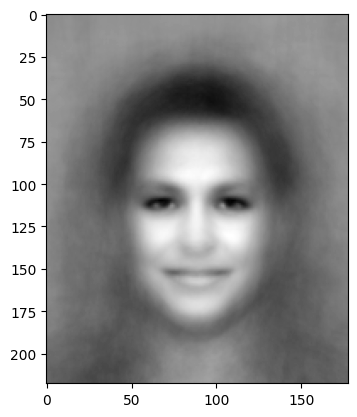

In [ ]:
# Compute the mean face D
#train = train_f.reshape((n, *size))
D = np.mean(train, axis=0)
plt.imshow(D, "gray")


In [ ]:
DDT = D @ D.T
eigs, vectors = sp.linalg.eigh(DDT)
# First 4 eigenvalues
print(eigs[:4])


[-7.16332812e-08 -1.11239248e-08 -2.55007380e-09 -1.96101164e-09]


In [ ]:
def project(Q, X):
    return np.dot(Q.T, X)


def pca(X, k, D):

    X_cp = X
    x_centered = X_cp - D
    print(x_centered.shape, D.shape)

    # Compute svd
    u, s, vh = np.linalg.svd(x_centered, full_matrices=False)

    u_truncated = np.resize(u, (X_cp.shape[0], k))
    u_truncated = u[:X_cp.shape[0], :k]

    Z = project(u_truncated, X_cp)

    return Z, u_truncated


In [ ]:
k = 2
X_train = train_f.T
Z, Q = pca(X_train[:, :100], k, D.flatten().reshape(-1, 1))


(38804, 100) (38804, 1)


(38804, 2)


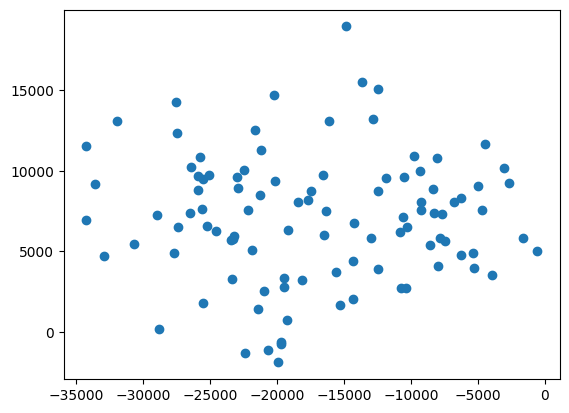

In [ ]:
plt.scatter(Z[0, :], Z[1, :])
print(Q.shape)


(38804, 400) (38804, 1)
Reconstruction error with k=20: 6983.0671870116985


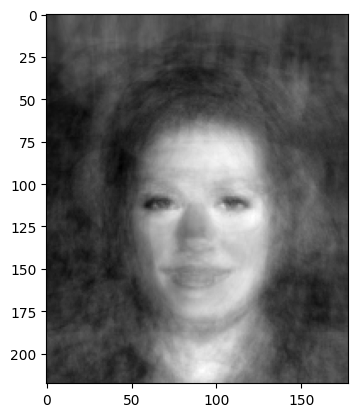

(38804, 400) (38804, 1)
Reconstruction error with k=10: 8512.546402846221


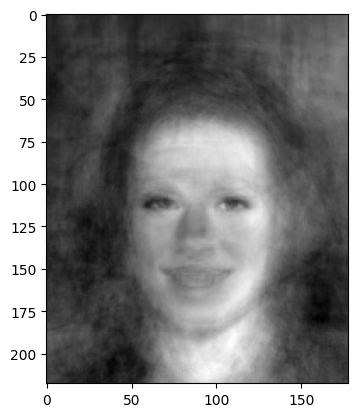

(38804, 400) (38804, 1)
Reconstruction error with k=5: 11550.811516773072


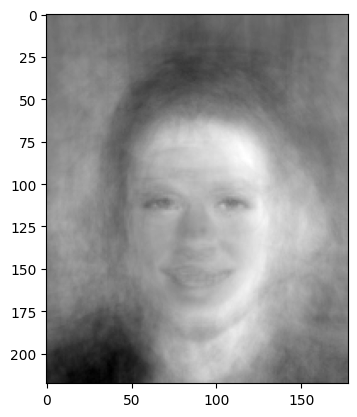

In [ ]:
values = [20, 10, 5]
for k in values:
    Z, Q = pca(X_train[:, :], k, D.flatten().reshape(-1, 1))
    originals = Q @ Z
    print(
        f"Reconstruction error with k={k}: {np.mean(np.linalg.norm(originals - X_train, axis=0))}")
    plt.imshow(originals[:, 0].reshape(size), "gray")
    plt.show()


In [ ]:
def face_recognition(img, win_size, Q, threshold):
    h, w = img.shape
    for i in range(w//win_size[1]):
        for j in range(h//win_size[0]):
            window = img[j*win_size[0]:(j+1)*win_size[0], i*win_size[1]: (i+1)*win_size[1], ]
            projection = project(Q, window.flatten())
            recontruction = Q @ projection
            if np.linalg.norm(window - recontruction.reshape(win_size)) < threshold:
                cv2.rectangle(
                    img, (i, j), (i + win_size[1], j + win_size[0]), (255, 0, 0), 2)
            else:
                pass
    plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
Z, Q = pca(X_train[:, :], 10, D.flatten().reshape(-1, 1))


(38804, 400) (38804, 1)


In [ ]:
# Load our test image
img_test = cv2.imread(path + "test.png")
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
print(img_test.shape)


(460, 860)


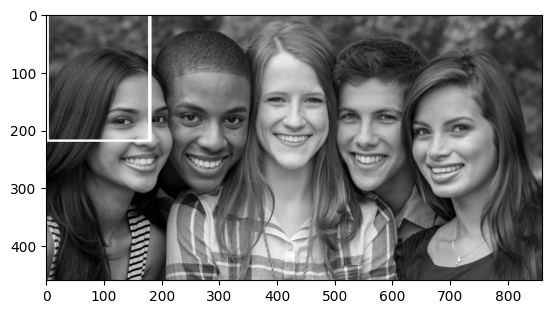

In [ ]:
face_recognition(img_test, size, Q, 10e4)
